In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.9.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images, train_labels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

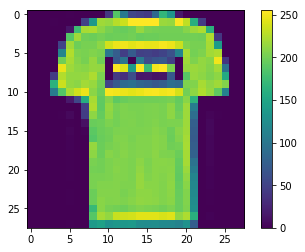

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.gca().grid(False)

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


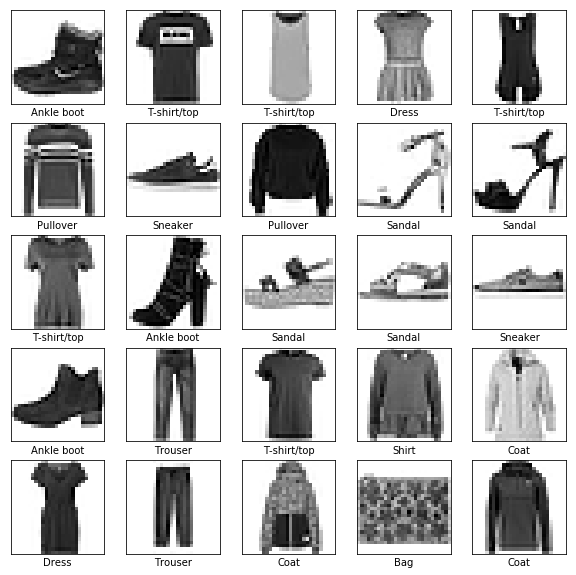

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
train_labels.shape

(60000,)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.2689 - acc: 0.9011
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.2589 - acc: 0.9030
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2487 - acc: 0.9073: 4s -  - ETA: 2s - loss: 0.247
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2401 - acc: 0.9097
Epoch 5/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2323 - acc: 0.9139


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/step
Test accuracy: 0.8833


In [17]:
predictions = model.predict(test_images)

In [18]:
predictions

array([[1.86986540e-07, 2.37995512e-10, 1.94757035e-07, ...,
        1.90333910e-02, 3.74767097e-08, 9.78858948e-01],
       [2.25141375e-05, 9.07862110e-15, 9.99360502e-01, ...,
        6.93160551e-19, 6.46246858e-12, 1.82232057e-14],
       [1.35203475e-08, 1.00000000e+00, 5.07909513e-12, ...,
        1.04176690e-19, 7.21475424e-14, 3.61799006e-16],
       ...,
       [1.12354528e-05, 9.84695919e-12, 7.78564299e-06, ...,
        1.68223053e-08, 9.99397755e-01, 1.30139240e-13],
       [2.70306884e-07, 9.99993205e-01, 1.06396481e-09, ...,
        1.01797612e-13, 3.12150791e-11, 3.81518185e-11],
       [2.46989257e-05, 4.14056380e-08, 9.02312604e-05, ...,
        3.16678104e-03, 1.47332001e-04, 4.37203307e-05]], dtype=float32)

In [19]:
for x in range(10000):
    y = np.argmax(predictions[x])
    #plt.figure()
    #plt.imshow(test_images[x])
    if y == test_labels[x]:
        print("Image No:"+str(x)+" : "+class_names[y])
    else:
        print("Image No:"+str(x)+" : "+"FAIL:: "+"Predicted as : "+class_names[y]+" instead of : "+class_names[test_labels[x]] )

Image No:0 : Ankle boot
Image No:1 : Pullover
Image No:2 : Trouser
Image No:3 : Trouser
Image No:4 : Shirt
Image No:5 : Trouser
Image No:6 : Coat
Image No:7 : Shirt
Image No:8 : Sandal
Image No:9 : Sneaker
Image No:10 : Coat
Image No:11 : Sandal
Image No:12 : FAIL:: Predicted as : Sandal instead of : Sneaker
Image No:13 : Dress
Image No:14 : Coat
Image No:15 : Trouser
Image No:16 : Pullover
Image No:17 : FAIL:: Predicted as : Pullover instead of : Coat
Image No:18 : Bag
Image No:19 : T-shirt/top
Image No:20 : Pullover
Image No:21 : Sandal
Image No:22 : Sneaker
Image No:23 : FAIL:: Predicted as : Sandal instead of : Ankle boot
Image No:24 : Trouser
Image No:25 : FAIL:: Predicted as : Pullover instead of : Coat
Image No:26 : Shirt
Image No:27 : T-shirt/top
Image No:28 : Ankle boot
Image No:29 : Dress
Image No:30 : Bag
Image No:31 : Bag
Image No:32 : Dress
Image No:33 : Dress
Image No:34 : Bag
Image No:35 : T-shirt/top
Image No:36 : Sneaker
Image No:37 : Sandal
Image No:38 : Sneaker
Image

Image No:1334 : Coat
Image No:1335 : Dress
Image No:1336 : Dress
Image No:1337 : Bag
Image No:1338 : Bag
Image No:1339 : FAIL:: Predicted as : Dress instead of : Pullover
Image No:1340 : T-shirt/top
Image No:1341 : Ankle boot
Image No:1342 : Coat
Image No:1343 : FAIL:: Predicted as : Pullover instead of : Coat
Image No:1344 : Bag
Image No:1345 : Trouser
Image No:1346 : Dress
Image No:1347 : Shirt
Image No:1348 : Trouser
Image No:1349 : Ankle boot
Image No:1350 : Pullover
Image No:1351 : Trouser
Image No:1352 : Shirt
Image No:1353 : Pullover
Image No:1354 : Sneaker
Image No:1355 : Ankle boot
Image No:1356 : FAIL:: Predicted as : Shirt instead of : Coat
Image No:1357 : Shirt
Image No:1358 : T-shirt/top
Image No:1359 : Coat
Image No:1360 : Coat
Image No:1361 : Pullover
Image No:1362 : Coat
Image No:1363 : Sandal
Image No:1364 : T-shirt/top
Image No:1365 : Pullover
Image No:1366 : Bag
Image No:1367 : Dress
Image No:1368 : Sneaker
Image No:1369 : Shirt
Image No:1370 : Coat
Image No:1371 : T

Image No:2333 : T-shirt/top
Image No:2334 : Coat
Image No:2335 : Ankle boot
Image No:2336 : T-shirt/top
Image No:2337 : FAIL:: Predicted as : Coat instead of : Pullover
Image No:2338 : Trouser
Image No:2339 : Ankle boot
Image No:2340 : Ankle boot
Image No:2341 : Bag
Image No:2342 : Trouser
Image No:2343 : Bag
Image No:2344 : Bag
Image No:2345 : Dress
Image No:2346 : Dress
Image No:2347 : Dress
Image No:2348 : Bag
Image No:2349 : Sandal
Image No:2350 : Ankle boot
Image No:2351 : FAIL:: Predicted as : Pullover instead of : Shirt
Image No:2352 : Shirt
Image No:2353 : Bag
Image No:2354 : Sneaker
Image No:2355 : T-shirt/top
Image No:2356 : Dress
Image No:2357 : T-shirt/top
Image No:2358 : T-shirt/top
Image No:2359 : FAIL:: Predicted as : Pullover instead of : T-shirt/top
Image No:2360 : Sandal
Image No:2361 : Sneaker
Image No:2362 : Sandal
Image No:2363 : T-shirt/top
Image No:2364 : Sneaker
Image No:2365 : Ankle boot
Image No:2366 : Trouser
Image No:2367 : Shirt
Image No:2368 : Coat
Image N

Image No:3029 : Ankle boot
Image No:3030 : Sneaker
Image No:3031 : Sandal
Image No:3032 : FAIL:: Predicted as : Coat instead of : Pullover
Image No:3033 : Bag
Image No:3034 : Bag
Image No:3035 : Dress
Image No:3036 : Shirt
Image No:3037 : Dress
Image No:3038 : T-shirt/top
Image No:3039 : Bag
Image No:3040 : Pullover
Image No:3041 : Pullover
Image No:3042 : Sandal
Image No:3043 : Ankle boot
Image No:3044 : Pullover
Image No:3045 : FAIL:: Predicted as : Dress instead of : Shirt
Image No:3046 : Bag
Image No:3047 : Dress
Image No:3048 : Pullover
Image No:3049 : Bag
Image No:3050 : Dress
Image No:3051 : Dress
Image No:3052 : Trouser
Image No:3053 : Trouser
Image No:3054 : Dress
Image No:3055 : T-shirt/top
Image No:3056 : Trouser
Image No:3057 : Bag
Image No:3058 : FAIL:: Predicted as : Pullover instead of : Coat
Image No:3059 : Trouser
Image No:3060 : Sandal
Image No:3061 : Bag
Image No:3062 : Trouser
Image No:3063 : Sandal
Image No:3064 : Bag
Image No:3065 : T-shirt/top
Image No:3066 : Sne

Image No:3664 : Sneaker
Image No:3665 : Ankle boot
Image No:3666 : Ankle boot
Image No:3667 : Sneaker
Image No:3668 : T-shirt/top
Image No:3669 : FAIL:: Predicted as : Coat instead of : Shirt
Image No:3670 : Pullover
Image No:3671 : Dress
Image No:3672 : Coat
Image No:3673 : FAIL:: Predicted as : T-shirt/top instead of : Pullover
Image No:3674 : FAIL:: Predicted as : Sneaker instead of : Ankle boot
Image No:3675 : Sandal
Image No:3676 : Dress
Image No:3677 : Ankle boot
Image No:3678 : Pullover
Image No:3679 : Bag
Image No:3680 : Bag
Image No:3681 : Shirt
Image No:3682 : T-shirt/top
Image No:3683 : Coat
Image No:3684 : Trouser
Image No:3685 : Ankle boot
Image No:3686 : Dress
Image No:3687 : Dress
Image No:3688 : Sandal
Image No:3689 : Trouser
Image No:3690 : FAIL:: Predicted as : Sneaker instead of : Sandal
Image No:3691 : Sandal
Image No:3692 : Ankle boot
Image No:3693 : Pullover
Image No:3694 : Bag
Image No:3695 : Sandal
Image No:3696 : Sandal
Image No:3697 : Ankle boot
Image No:3698 

Image No:4332 : Ankle boot
Image No:4333 : Coat
Image No:4334 : Ankle boot
Image No:4335 : T-shirt/top
Image No:4336 : Coat
Image No:4337 : Shirt
Image No:4338 : Sandal
Image No:4339 : Sneaker
Image No:4340 : T-shirt/top
Image No:4341 : Bag
Image No:4342 : Trouser
Image No:4343 : Sneaker
Image No:4344 : Sandal
Image No:4345 : Coat
Image No:4346 : Ankle boot
Image No:4347 : Sandal
Image No:4348 : Sneaker
Image No:4349 : Dress
Image No:4350 : Pullover
Image No:4351 : T-shirt/top
Image No:4352 : Ankle boot
Image No:4353 : Bag
Image No:4354 : Sneaker
Image No:4355 : Dress
Image No:4356 : Sneaker
Image No:4357 : Sneaker
Image No:4358 : Coat
Image No:4359 : Sneaker
Image No:4360 : Sandal
Image No:4361 : Bag
Image No:4362 : FAIL:: Predicted as : Bag instead of : Sandal
Image No:4363 : Pullover
Image No:4364 : Coat
Image No:4365 : FAIL:: Predicted as : T-shirt/top instead of : Shirt
Image No:4366 : Pullover
Image No:4367 : Dress
Image No:4368 : Bag
Image No:4369 : Ankle boot
Image No:4370 : Sn

Image No:5331 : Trouser
Image No:5332 : Sneaker
Image No:5333 : Dress
Image No:5334 : FAIL:: Predicted as : Dress instead of : T-shirt/top
Image No:5335 : Bag
Image No:5336 : FAIL:: Predicted as : Pullover instead of : Coat
Image No:5337 : Sneaker
Image No:5338 : T-shirt/top
Image No:5339 : Bag
Image No:5340 : Ankle boot
Image No:5341 : Bag
Image No:5342 : Bag
Image No:5343 : Coat
Image No:5344 : Sandal
Image No:5345 : Shirt
Image No:5346 : Coat
Image No:5347 : Sandal
Image No:5348 : Ankle boot
Image No:5349 : FAIL:: Predicted as : Shirt instead of : T-shirt/top
Image No:5350 : T-shirt/top
Image No:5351 : Sandal
Image No:5352 : Dress
Image No:5353 : Sneaker
Image No:5354 : Sneaker
Image No:5355 : Coat
Image No:5356 : Coat
Image No:5357 : Sneaker
Image No:5358 : Coat
Image No:5359 : Sandal
Image No:5360 : Bag
Image No:5361 : Dress
Image No:5362 : Sneaker
Image No:5363 : Pullover
Image No:5364 : Sneaker
Image No:5365 : Dress
Image No:5366 : Bag
Image No:5367 : Bag
Image No:5368 : Bag
Ima

Image No:6078 : T-shirt/top
Image No:6079 : Ankle boot
Image No:6080 : Trouser
Image No:6081 : Trouser
Image No:6082 : Bag
Image No:6083 : Pullover
Image No:6084 : Bag
Image No:6085 : FAIL:: Predicted as : Ankle boot instead of : Sneaker
Image No:6086 : Pullover
Image No:6087 : T-shirt/top
Image No:6088 : Sneaker
Image No:6089 : Pullover
Image No:6090 : T-shirt/top
Image No:6091 : T-shirt/top
Image No:6092 : Sandal
Image No:6093 : Trouser
Image No:6094 : FAIL:: Predicted as : Shirt instead of : T-shirt/top
Image No:6095 : Bag
Image No:6096 : Shirt
Image No:6097 : Dress
Image No:6098 : Sneaker
Image No:6099 : FAIL:: Predicted as : Coat instead of : Pullover
Image No:6100 : Trouser
Image No:6101 : Ankle boot
Image No:6102 : Sneaker
Image No:6103 : Coat
Image No:6104 : Trouser
Image No:6105 : Dress
Image No:6106 : Ankle boot
Image No:6107 : Pullover
Image No:6108 : Coat
Image No:6109 : T-shirt/top
Image No:6110 : Dress
Image No:6111 : Sneaker
Image No:6112 : Sandal
Image No:6113 : Trouser

Image No:6675 : Trouser
Image No:6676 : FAIL:: Predicted as : Coat instead of : Dress
Image No:6677 : Sneaker
Image No:6678 : FAIL:: Predicted as : Pullover instead of : Coat
Image No:6679 : FAIL:: Predicted as : Shirt instead of : T-shirt/top
Image No:6680 : Sneaker
Image No:6681 : Trouser
Image No:6682 : Shirt
Image No:6683 : Sandal
Image No:6684 : Pullover
Image No:6685 : T-shirt/top
Image No:6686 : Sneaker
Image No:6687 : Ankle boot
Image No:6688 : FAIL:: Predicted as : Shirt instead of : T-shirt/top
Image No:6689 : Dress
Image No:6690 : Bag
Image No:6691 : Pullover
Image No:6692 : Trouser
Image No:6693 : Trouser
Image No:6694 : Bag
Image No:6695 : Bag
Image No:6696 : Dress
Image No:6697 : Sandal
Image No:6698 : Sneaker
Image No:6699 : Sandal
Image No:6700 : Shirt
Image No:6701 : FAIL:: Predicted as : Ankle boot instead of : Sneaker
Image No:6702 : Coat
Image No:6703 : Dress
Image No:6704 : Ankle boot
Image No:6705 : Dress
Image No:6706 : Bag
Image No:6707 : Ankle boot
Image No:670

Image No:7733 : Coat
Image No:7734 : Sandal
Image No:7735 : Ankle boot
Image No:7736 : FAIL:: Predicted as : Shirt instead of : Coat
Image No:7737 : Dress
Image No:7738 : Sandal
Image No:7739 : T-shirt/top
Image No:7740 : Pullover
Image No:7741 : Sandal
Image No:7742 : Sandal
Image No:7743 : Dress
Image No:7744 : Trouser
Image No:7745 : Ankle boot
Image No:7746 : Dress
Image No:7747 : Sneaker
Image No:7748 : Trouser
Image No:7749 : T-shirt/top
Image No:7750 : Dress
Image No:7751 : Coat
Image No:7752 : Coat
Image No:7753 : Pullover
Image No:7754 : Sandal
Image No:7755 : FAIL:: Predicted as : Ankle boot instead of : Sneaker
Image No:7756 : Pullover
Image No:7757 : Trouser
Image No:7758 : Trouser
Image No:7759 : Sneaker
Image No:7760 : Sneaker
Image No:7761 : Sneaker
Image No:7762 : T-shirt/top
Image No:7763 : Trouser
Image No:7764 : Shirt
Image No:7765 : Bag
Image No:7766 : Sandal
Image No:7767 : Pullover
Image No:7768 : Sandal
Image No:7769 : Dress
Image No:7770 : Sneaker
Image No:7771 

Image No:8329 : Trouser
Image No:8330 : FAIL:: Predicted as : Shirt instead of : Coat
Image No:8331 : Trouser
Image No:8332 : Ankle boot
Image No:8333 : T-shirt/top
Image No:8334 : Coat
Image No:8335 : Trouser
Image No:8336 : Trouser
Image No:8337 : T-shirt/top
Image No:8338 : FAIL:: Predicted as : Ankle boot instead of : Sneaker
Image No:8339 : Dress
Image No:8340 : Sneaker
Image No:8341 : Dress
Image No:8342 : Ankle boot
Image No:8343 : T-shirt/top
Image No:8344 : Trouser
Image No:8345 : Bag
Image No:8346 : Ankle boot
Image No:8347 : FAIL:: Predicted as : Shirt instead of : T-shirt/top
Image No:8348 : FAIL:: Predicted as : Shirt instead of : T-shirt/top
Image No:8349 : Shirt
Image No:8350 : T-shirt/top
Image No:8351 : Ankle boot
Image No:8352 : Trouser
Image No:8353 : Shirt
Image No:8354 : Trouser
Image No:8355 : Pullover
Image No:8356 : Sneaker
Image No:8357 : Bag
Image No:8358 : T-shirt/top
Image No:8359 : Sandal
Image No:8360 : Shirt
Image No:8361 : Bag
Image No:8362 : Pullover
Im

Image No:8829 : Sneaker
Image No:8830 : Sandal
Image No:8831 : Sneaker
Image No:8832 : FAIL:: Predicted as : Shirt instead of : T-shirt/top
Image No:8833 : Ankle boot
Image No:8834 : T-shirt/top
Image No:8835 : T-shirt/top
Image No:8836 : Dress
Image No:8837 : Trouser
Image No:8838 : Coat
Image No:8839 : Sneaker
Image No:8840 : Ankle boot
Image No:8841 : Dress
Image No:8842 : Shirt
Image No:8843 : Sneaker
Image No:8844 : Bag
Image No:8845 : Coat
Image No:8846 : Sneaker
Image No:8847 : Coat
Image No:8848 : T-shirt/top
Image No:8849 : Bag
Image No:8850 : Dress
Image No:8851 : T-shirt/top
Image No:8852 : Trouser
Image No:8853 : Sneaker
Image No:8854 : Ankle boot
Image No:8855 : Shirt
Image No:8856 : Ankle boot
Image No:8857 : Trouser
Image No:8858 : FAIL:: Predicted as : Shirt instead of : Coat
Image No:8859 : Shirt
Image No:8860 : Sneaker
Image No:8861 : Trouser
Image No:8862 : T-shirt/top
Image No:8863 : Shirt
Image No:8864 : Dress
Image No:8865 : FAIL:: Predicted as : Sandal instead of

Image No:9328 : Ankle boot
Image No:9329 : Pullover
Image No:9330 : Shirt
Image No:9331 : Pullover
Image No:9332 : Ankle boot
Image No:9333 : Bag
Image No:9334 : T-shirt/top
Image No:9335 : Sandal
Image No:9336 : Ankle boot
Image No:9337 : Pullover
Image No:9338 : Coat
Image No:9339 : Sandal
Image No:9340 : Pullover
Image No:9341 : Trouser
Image No:9342 : T-shirt/top
Image No:9343 : Sneaker
Image No:9344 : FAIL:: Predicted as : Pullover instead of : Coat
Image No:9345 : Coat
Image No:9346 : Pullover
Image No:9347 : FAIL:: Predicted as : Sandal instead of : Sneaker
Image No:9348 : Coat
Image No:9349 : FAIL:: Predicted as : Pullover instead of : T-shirt/top
Image No:9350 : Shirt
Image No:9351 : Shirt
Image No:9352 : Trouser
Image No:9353 : Sandal
Image No:9354 : Coat
Image No:9355 : T-shirt/top
Image No:9356 : Trouser
Image No:9357 : Ankle boot
Image No:9358 : Ankle boot
Image No:9359 : Sandal
Image No:9360 : Shirt
Image No:9361 : Sandal
Image No:9362 : FAIL:: Predicted as : Shirt instea

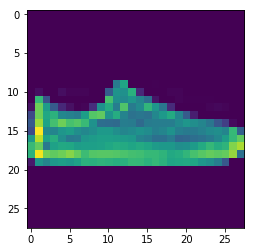

In [20]:
plt.figure()
plt.imshow(test_images[12])

In [72]:
import PIL
from PIL import Image
trial = Image.open('/Users/Prashanth/Desktop/Shoe.jpg')

In [73]:
basewidth = 28
wpercent = (basewidth/float(trial.size[0]))
hsize = int((float(trial.size[1])*float(wpercent)))
trial = trial.resize((basewidth,hsize), Image.ANTIALIAS)
trial.save('/Users/Prashanth/Desktop/Shoe.jpg')

AttributeError: 'Image' object has no attribute 'shape'

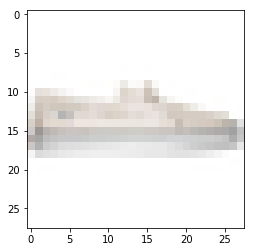

In [82]:
plt.figure()
plt.imshow(trial)

In [80]:
test_images.shape

(10000, 28, 28)

In [81]:
trial.shape

AttributeError: 'Image' object has no attribute 'shape'